# Morphological Operators:
* [Morphology](https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm)
* [Mathematical morphology](https://en.wikipedia.org/wiki/Mathematical_morphology)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

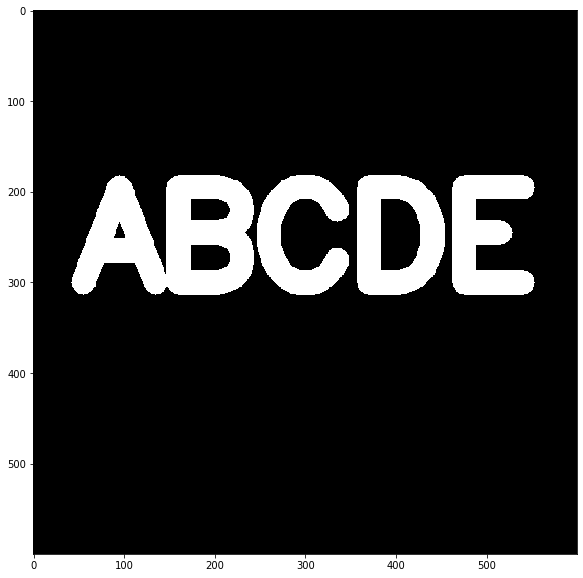

In [8]:
img = load_img()
display_img(img)

# Erosion

In [5]:
kernel = np.ones((5,5),np.uint8)

In [6]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

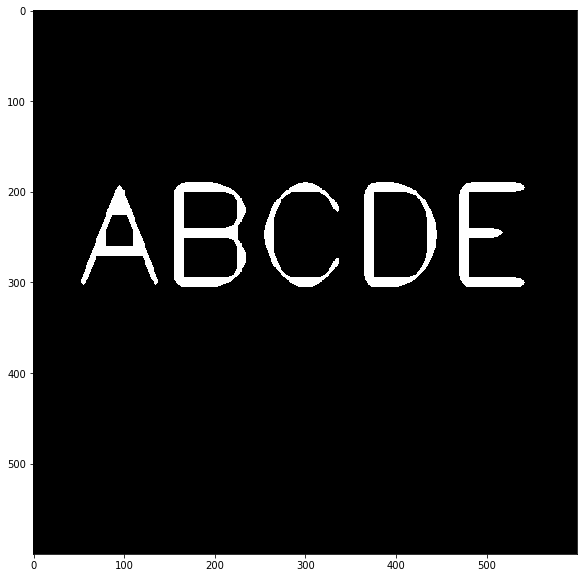

In [9]:
result=cv2.erode(img,kernel,iterations=4)
display_img(result)

# Opening: For background noise

In [10]:
img = load_img()
# display_img(img)

In [11]:
white_noise = np.random.randint(0,2,(600,600))
white_noise

array([[1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [13]:
# display_img(white_noise)

In [14]:
img.max()

255.0

In [15]:
white_noise = white_noise * 255

In [16]:
white_noise

array([[255,   0,   0, ..., 255,   0,   0],
       [255,   0,   0, ...,   0, 255,   0],
       [255, 255,   0, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0, 255, 255, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0, 255,   0]])

In [18]:
# display_img(white_noise)

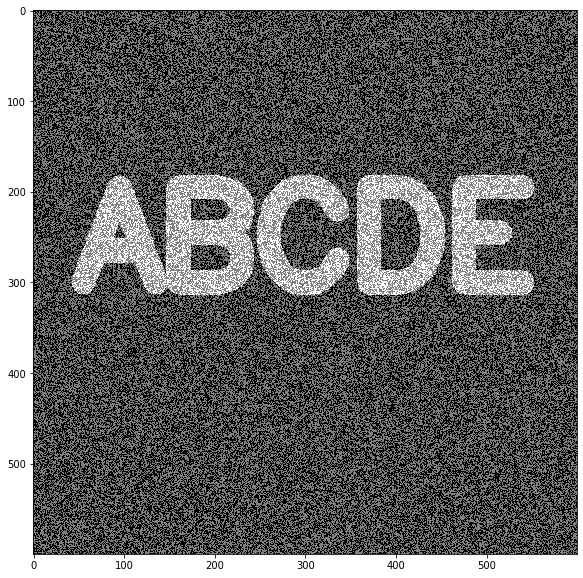

In [19]:
noise_img = white_noise + img
display_img(noise_img)

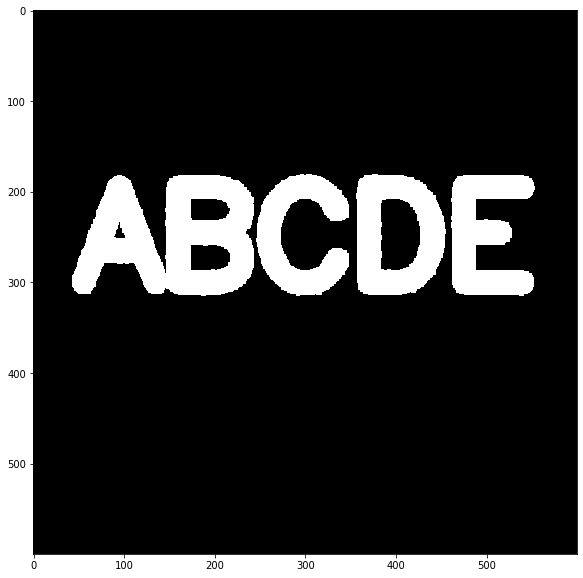

In [20]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

# Closing: for foreground noise

In [21]:
img = load_img()

In [22]:
black_noise = np.random.randint(0,2,(600,600))

In [23]:
black_noise = black_noise * -255

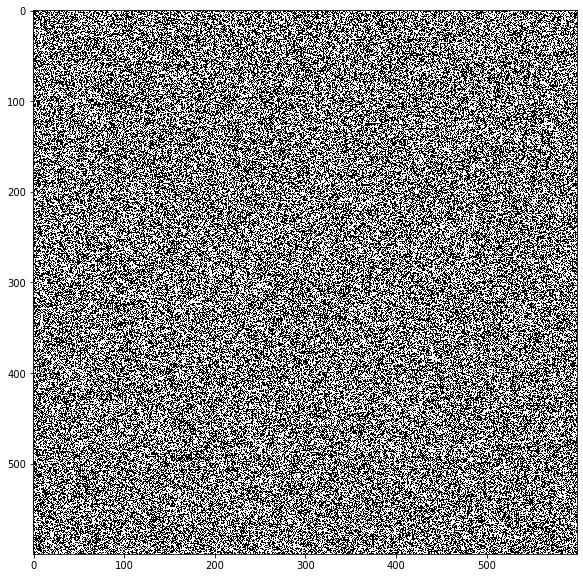

In [24]:
display_img(black_noise)

In [25]:
black_noise_img = img + black_noise

In [26]:
black_noise_img

array([[   0.,    0., -255., ...,    0., -255., -255.],
       [-255., -255., -255., ...,    0., -255.,    0.],
       [   0., -255., -255., ..., -255.,    0., -255.],
       ...,
       [   0., -255.,    0., ..., -255., -255., -255.],
       [   0., -255., -255., ...,    0., -255., -255.],
       [   0., -255.,    0., ...,    0.,    0., -255.]])

In [27]:
black_noise_img[black_noise_img == - 255] = 0

In [28]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

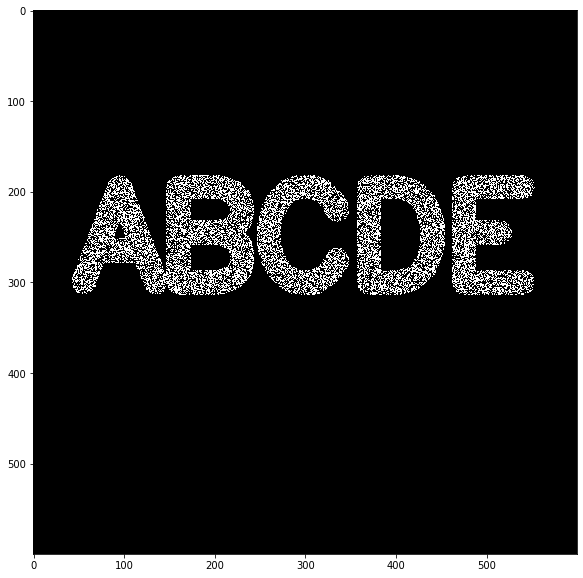

In [29]:
display_img(black_noise_img)

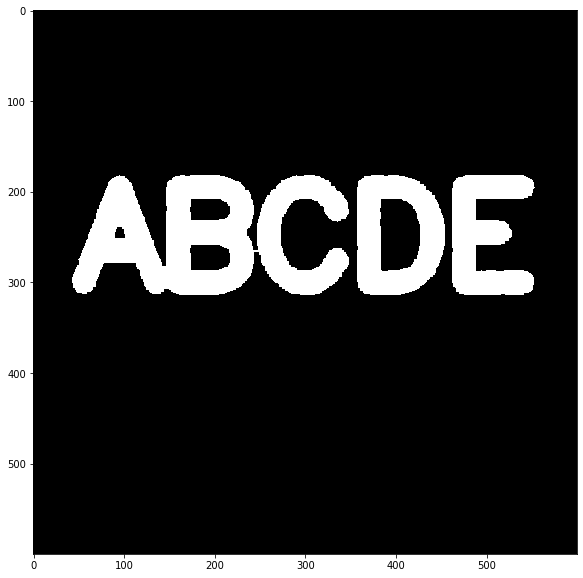

In [30]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

# Gradient

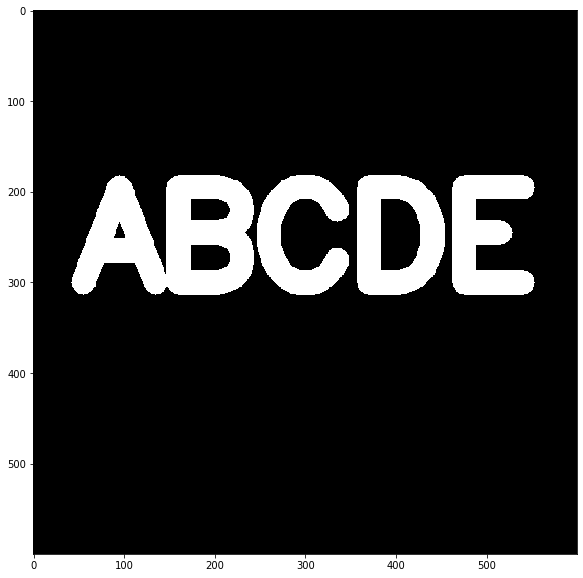

In [31]:
img = load_img()
display_img(img)

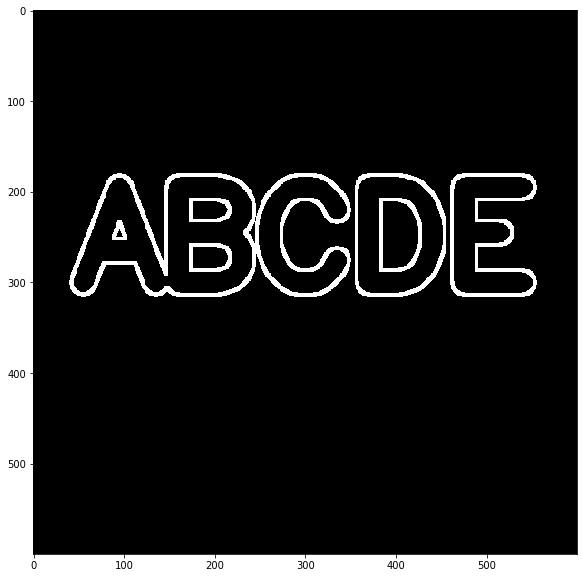

In [32]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)